<a href="https://colab.research.google.com/github/kothawadegs/Deep-Learning/blob/master/S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/API_Repo

/content/gdrive/My Drive/API_Repo


In [0]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pwd

'/content/gdrive/My Drive/API_Repo'

In [5]:
ls

cudas.py                 mobilenet.py         senet.py
data_loader.py           mobilenetv2.py       shufflenet.py
densenet.py              model.py             shufflenetv2.py
dpn.py                   orig_pred_images.py  summary.py
efficientnet.py          packages.py          test_accuracy.py
googlenet.py             pnasnet.py           test.py
individual_class_acc.py  preact_resnet.py     train.py
__init__.py              resnet.py            vgg.py
lenet.py                 resnext.py


In [6]:
import data_loader

trainloader = data_loader.trainloader
testloader =  data_loader.testloader
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
import model
from summary import model_summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

net = model.ResNet18().to(device)
model_summary(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14           [-1, 64,

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [9]:
import torch
from tqdm import tqdm
import train
import test
test_acc = []
train_acc = []
for epoch in range(30):  # loop over the dataset multiple times
    if epoch>10:
      scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(train.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(test.test(net, device, testloader))
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.1


Epoch= 0 Loss=1.5996448993682861 Batch_id=390 Accuracy=40.00: 100%|██████████| 391/391 [01:11<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 40 %
lr=  0.1


Epoch= 1 Loss=1.5011428594589233 Batch_id=390 Accuracy=43.75: 100%|██████████| 391/391 [01:12<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 49 %
lr=  0.1


Epoch= 2 Loss=1.0255182981491089 Batch_id=390 Accuracy=70.00: 100%|██████████| 391/391 [01:14<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 63 %
lr=  0.1


Epoch= 3 Loss=0.8440259695053101 Batch_id=390 Accuracy=76.25: 100%|██████████| 391/391 [01:13<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 68 %
lr=  0.1


Epoch= 4 Loss=0.534462571144104 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [01:13<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 71 %
lr=  0.1


Epoch= 5 Loss=0.7883251309394836 Batch_id=390 Accuracy=78.75: 100%|██████████| 391/391 [01:13<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 72 %
lr=  0.1


Epoch= 6 Loss=0.6541572213172913 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [01:13<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75 %
lr=  0.1


Epoch= 7 Loss=0.6818809509277344 Batch_id=390 Accuracy=85.00: 100%|██████████| 391/391 [01:13<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77 %
lr=  0.1


Epoch= 8 Loss=0.4243186116218567 Batch_id=390 Accuracy=88.75: 100%|██████████| 391/391 [01:14<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79 %
lr=  0.1


Epoch= 9 Loss=0.5000489950180054 Batch_id=390 Accuracy=85.00: 100%|██████████| 391/391 [01:13<00:00,  6.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80 %
lr=  0.1


Epoch= 10 Loss=0.4114537239074707 Batch_id=390 Accuracy=92.50: 100%|██████████| 391/391 [01:13<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81 %
lr=  0.1


Epoch= 11 Loss=0.29338064789772034 Batch_id=390 Accuracy=92.50: 100%|██████████| 391/391 [01:13<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 12 Loss=0.46084389090538025 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [01:13<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82 %
lr=  0.1


Epoch= 13 Loss=0.48610925674438477 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [01:13<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 14 Loss=0.13466235995292664 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [01:13<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82 %
lr=  0.1


Epoch= 15 Loss=0.31722745299339294 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [01:13<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 16 Loss=0.31094497442245483 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [01:14<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.1


Epoch= 17 Loss=0.3370963931083679 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [01:13<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 18 Loss=0.18977923691272736 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 19 Loss=0.19788439571857452 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85 %
lr=  0.05


Epoch= 20 Loss=0.06671382486820221 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 21 Loss=0.06316030770540237 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:13<00:00,  6.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 22 Loss=0.028964484110474586 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 23 Loss=0.02353217639029026 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 24 Loss=0.008939450606703758 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:14<00:00,  6.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 25 Loss=0.003814697265625 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:13<00:00,  6.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87 %
lr=  0.05


Epoch= 26 Loss=0.02856440469622612 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 27 Loss=0.019999777898192406 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:14<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85 %
lr=  0.05


Epoch= 28 Loss=0.004661840386688709 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  6.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 29 Loss=0.1669401228427887 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:14<00:00,  6.04it/s]
100%|██████████| 79/79 [00:03<00:00, 24.11it/s]

Accuracy of the network on the 10000 test images: 85 %
Finished Training


Text(0, 0.5, 'Accuracy')

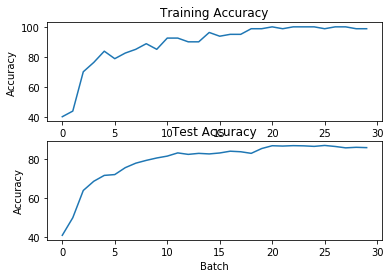

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

In [11]:
test.test_categorywise(net, device, testloader, classes)

100%|██████████| 79/79 [00:03<00:00, 20.95it/s]

Accuracy of plane : 88 %
Accuracy of   car : 92 %
Accuracy of  bird : 89 %
Accuracy of   cat : 81 %
Accuracy of  deer : 92 %
Accuracy of   dog : 82 %
Accuracy of  frog : 96 %
Accuracy of horse : 90 %
Accuracy of  ship : 93 %
Accuracy of truck : 93 %
